In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    readHEPDataCsv,
    implementPairDecayLimit,
    fromHB5Table1,
    relevantGridEntries,
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution

# CMS 13TeV LHC


## `hSM > a a > 4 gam`, [2208.01469](https://arxiv.org/abs/2208.01469)

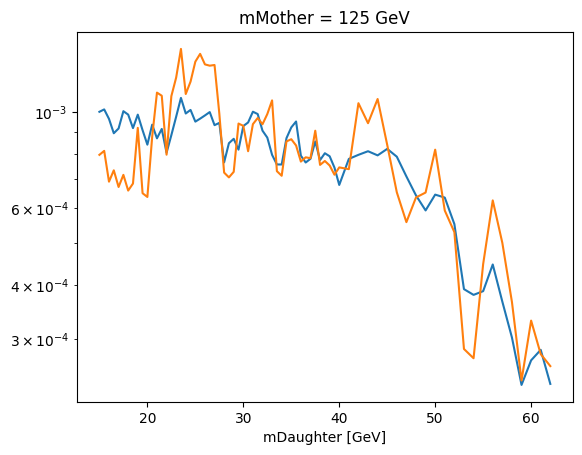

Looks good. Saving this to H_LHC13_CMS_132.json


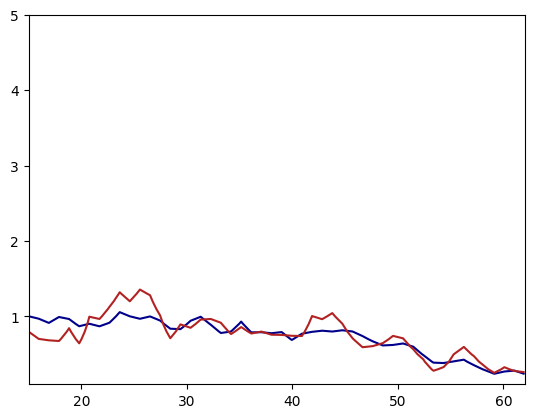

In [6]:
dfs = readHEPDataCsv('https://www.hepdata.net/download/table/ins2130106/Limit/1/csv', na_values="-")
df = dfs[0].rename(columns={'Pseudoscalar mass [GeV]': 'mDaughter',
                            'Cross section upper limit at 95% CL [fb]': 'obs',
                            })

df['exp'] = dfs[1]['Cross section upper limit at 95% CL [fb]']
df['mMother']=125
df.exp *= 1e-3  # fb to pb
df.obs *= 1e-3  # fb to pb
limitFile = implementPairDecayLimit(
    2130106,
    {
        "production": ["H"],
        "firstDecay": ["gamgam"],
        "secondDecay": ["gamgam"],
    },
    "Fig. 6",
    df,
    massResolution={
        "firstDaughter": resolution.gamgam["default"], 
        "secondDaughter": resolution.gamgam["default"],
        "mother": {
            "absolute": 3.75, 
            "relative": 0.03,
        },
    },
    # constraints={
    #         'firstDaughter':[{'CPValue':'odd'},],
    #         'secondDaughter':[{'CPValue':'odd'},],
    # },
)
lim = HB.Limit(limitFile)


pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh", "even"))
a = pred.addParticle(HP.NeutralScalar("a", "odd"))
hh.setDecayWidth("a", "a", 1.0)
a.setDecayWidth("gamgam", 1.0)
hh.setMass(125)
hm = np.linspace(15, 62)
r = np.linspace(1e-1, 5) 

def testAgainstLimit(mass, rate):
    a.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate*1e-3)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return app[0].expRatio(), app[0].obsRatio()

test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)


def debug(npda):
    lst = []
    for li in npda:
        lst.append(list(li))
    return(lst)

expR = debug(expR)
obsR = debug(obsR)


fig, ax = plt.subplots(1,1)
expCc = ax.contour(XX, YY, expR, levels=[1.0,], colors=["darkblue"])
obsCc = ax.contour(XX, YY, obsR, levels=[1.0,], colors=["firebrick"])
# expCc.collections[0].set_label("expRatio = 1")
# obsCc.collections[0].set_label("obsRatio = 1")

## `hSM > a a > 4 gam`, low mass [2209.06197](https://arxiv.org/abs/2209.06197)


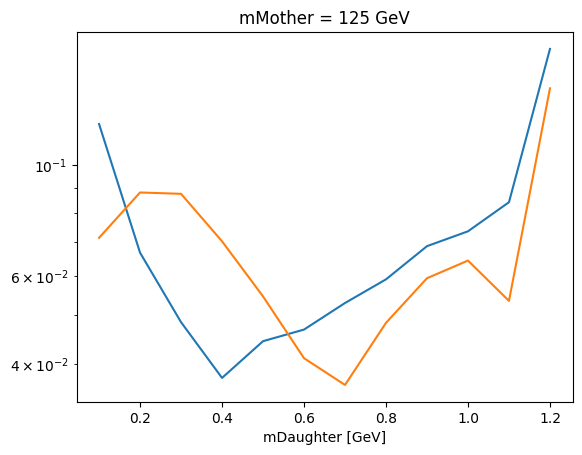

Looks good. Saving this to H_lowMass_LHC13_CMS_136.json


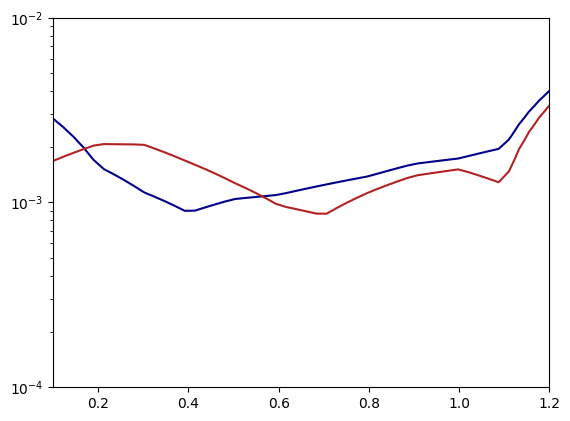

In [5]:
dfs = readHEPDataCsv('https://www.hepdata.net/download/table/ins2151007/95%25%20CL%20upper%20limits/1/csv', na_values="-")


df = dfs[0].rename(columns={r'$m_{\mathcal{A}}$ [GeV]': 'mDaughter',
                            r'95% CL upper limit on $\mathcal{B}(\mathrm{H} \rightarrow \mathcal{A}\mathcal{A} \rightarrow 4\gamma)$': 'obs',})
df['exp'] = dfs[1][r'95% CL upper limit on $\mathcal{B}(\mathrm{H} \rightarrow \mathcal{A}\mathcal{A} \rightarrow 4\gamma)$']
df["mMother"] = 125


ref = HP.SMHiggs(125)
refCxn = ref.cxn("LHC13", 'H') 
df.obs *= refCxn
df.exp *= refCxn


limitFile = implementPairDecayLimit(
    2151007,
    {
        "production": ["H"],
        "firstDecay": ["gamgam"],
        "secondDecay": ["gamgam"],
    },
    "Fig. 2",
    df,
    prefix='H_lowMass',
    massResolution={
        "firstDaughter": resolution.gamgam["default"], 
        "secondDaughter": resolution.gamgam["default"],
        "mother": {
            "absolute": 10,  # guess
            "relative": 0,
        },
    },
    # constraints={
    #         'firstDaughter':[{'CPValue':'odd'},],
    #         'secondDaughter':[{'CPValue':'odd'},],
    # },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh", "even"))
a = pred.addParticle(HP.NeutralScalar("a", "odd"))
hh.setDecayWidth("a", "a", 1.0)
a.setDecayWidth("gamgam", 1.0)
hh.setMass(125)
hm = np.linspace(0.1, 1.2)
r = np.linspace(1e-4, 1e-2)

def testAgainstLimit(mass, rate):
    a.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate * refCxn)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return app[0].expRatio(), app[0].obsRatio()

test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)

def debug(npda):
    lst = []
    for li in npda:
        lst.append(list(li))
    return(lst)

expR = debug(expR)
obsR = debug(obsR)

fig, ax = plt.subplots(1,1)
expCc = ax.contour(XX, YY, expR, levels=[1.0,], colors=["darkblue"])
obsCc = ax.contour(XX, YY, obsR, levels=[1.0,], colors=["firebrick"])
# expCc.collections[0].set_label("expRatio = 1")
# obsCc.collections[0].set_label("obsRatio = 1")
ax.set_yscale('log')